In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv(r'water_potability.csv')

# Fill missing values (if not handled earlier)
df.fillna(df.median(), inplace=True)

# 1. Compute Water Hardness Index
def categorize_hardness(value):
    if value <= 75:
        return "Soft"
    elif value <= 150:
        return "Moderate"
    elif value <= 300:
        return "Hard"
    else:
        return "Very Hard"

df['Hardness_Category'] = df['Hardness'].apply(categorize_hardness)

# 2. Compute Contamination Risk Score (normalized)
df['Contamination_Risk'] = (df['ph'] * 0.4) + (df['Turbidity'] * 0.3) + (df['Solids'] * 0.3)

df['Contamination_Risk'] = (df['Contamination_Risk'] - df['Contamination_Risk'].min()) / \
                            (df['Contamination_Risk'].max() - df['Contamination_Risk'].min())

# 3. Compute Water Quality Score (scaled sum of features)
feature_weights = {
    'ph': 0.2,
    'Hardness': 0.15,
    'Solids': 0.1,
    'Chloramines': 0.15,
    'Sulfate': 0.1,
    'Conductivity': 0.15,
    'Organic_carbon': 0.05,
    'Trihalomethanes': 0.05,
    'Turbidity': 0.05
}
df['Water_Quality_Score'] = sum(df[col] * weight for col, weight in feature_weights.items())

# Normalize the Water Quality Score
df['Water_Quality_Score'] = (df['Water_Quality_Score'] - df['Water_Quality_Score'].min()) / \
                            (df['Water_Quality_Score'].max() - df['Water_Quality_Score'].min())

# Display the new dataframe
print(df.head())


         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.036752  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.073546    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.073546    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability Hardness_Category  \
0       10.379783        86.990970   2.963135           0              Hard   
1       15.180013        56.329076   4.500656           0          Moderate   
2       16.868637        66.420093   3.055934           0              Hard   
3       18.436524       100.341674   4.628771           0              Hard   
4       11.558279        31.997993   4.075075           0              Hard   

   Contamination_Risk  Water_Quality_Score  

In [2]:
# Normalize features (scaling between 0 and 1)
cols_to_normalize = ['ph', 'Hardness', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes']
df[cols_to_normalize] = df[cols_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Calculate Water Safety Index (WSI)
df['Water_Safety_Index'] = ((df['ph'] + df['Hardness'] + df['Sulfate'] +
                             df['Conductivity'] + df['Organic_carbon'] +
                             df['Trihalomethanes'] - df['Turbidity']) / 6) * 100

# Display the first few rows
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Hardness_Category,Contamination_Risk,Water_Quality_Score,Water_Safety_Index
0,0.502625,0.571139,20791.318981,7.300212,0.680385,0.669439,0.313402,0.699753,2.963135,0,Hard,0.336080,0.341388,7.893471
1,0.265434,0.297400,18630.057858,6.635246,0.579704,0.719411,0.497319,0.450999,4.500656,0,Moderate,0.300548,0.303760,-28.173145
2,0.578509,0.641311,19909.541732,9.275884,0.579704,0.414652,0.562017,0.532866,3.055934,0,Hard,0.321628,0.323146,4.218739
3,0.594055,0.605536,22018.417441,8.059332,0.647347,0.317880,0.622089,0.808065,4.628771,0,Hard,0.356283,0.356910,-17.229971
4,0.649445,0.484851,17978.986339,6.546600,0.514545,0.379337,0.358555,0.253606,4.075075,0,Hard,0.289969,0.289087,-23.912285


In [3]:
# Define function for categorization
def categorize_wsi(wsi):
    if wsi >= 70:
        return "Safe"
    elif 50 <= wsi < 70:
        return "Moderate"
    else:
        return "Unsafe"

# Apply categorization
df['Water_Safety_Level'] = df['Water_Safety_Index'].apply(categorize_wsi)

# Display updated DataFrame
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Hardness_Category,Contamination_Risk,Water_Quality_Score,Water_Safety_Index,Water_Safety_Level
0,0.502625,0.571139,20791.318981,7.300212,0.680385,0.669439,0.313402,0.699753,2.963135,0,Hard,0.336080,0.341388,7.893471,Unsafe
1,0.265434,0.297400,18630.057858,6.635246,0.579704,0.719411,0.497319,0.450999,4.500656,0,Moderate,0.300548,0.303760,-28.173145,Unsafe
2,0.578509,0.641311,19909.541732,9.275884,0.579704,0.414652,0.562017,0.532866,3.055934,0,Hard,0.321628,0.323146,4.218739,Unsafe
3,0.594055,0.605536,22018.417441,8.059332,0.647347,0.317880,0.622089,0.808065,4.628771,0,Hard,0.356283,0.356910,-17.229971,Unsafe
4,0.649445,0.484851,17978.986339,6.546600,0.514545,0.379337,0.358555,0.253606,4.075075,0,Hard,0.289969,0.289087,-23.912285,Unsafe


In [4]:
# Recalculate Water Safety Index (Ensure all features are properly weighted)
df['Water_Safety_Index'] = (
    df['ph'] * 0.15 +
    df['Hardness'] * 0.10 +
    df['Sulfate'] * 0.10 +
    df['Conductivity'] * 0.15 +
    df['Organic_carbon'] * 0.10 +
    df['Trihalomethanes'] * 0.10 +
    df['Turbidity'] * 0.10
) * 100  # Scale to 0-100 range

df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Hardness_Category,Contamination_Risk,Water_Quality_Score,Water_Safety_Index,Water_Safety_Level
0,0.502625,0.571139,20791.318981,7.300212,0.680385,0.669439,0.313402,0.699753,2.963135,0,Hard,0.336080,0.341388,69.859113,Unsafe
1,0.265434,0.297400,18630.057858,6.635246,0.579704,0.719411,0.497319,0.450999,4.500656,0,Moderate,0.300548,0.303760,78.033465,Unsafe
2,0.578509,0.641311,19909.541732,9.275884,0.579704,0.414652,0.562017,0.532866,3.055934,0,Hard,0.321628,0.323146,68.615723,Unsafe
3,0.594055,0.605536,22018.417441,8.059332,0.647347,0.317880,0.622089,0.808065,4.628771,0,Hard,0.356283,0.356910,86.797104,Unsafe
4,0.649445,0.484851,17978.986339,6.546600,0.514545,0.379337,0.358555,0.253606,4.075075,0,Hard,0.289969,0.289087,72.298044,Unsafe


In [5]:
df[df['Water_Safety_Index'] < 0]


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Hardness_Category,Contamination_Risk,Water_Quality_Score,Water_Safety_Index,Water_Safety_Level


In [6]:
def categorize_wsi(wsi):
    if wsi >= 70:
        return "Safe"
    elif 50 <= wsi < 70:
        return "Moderate"
    else:
        return "Unsafe"

df['Water_Safety_Level'] = df['Water_Safety_Index'].apply(categorize_wsi)
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Hardness_Category,Contamination_Risk,Water_Quality_Score,Water_Safety_Index,Water_Safety_Level
0,0.502625,0.571139,20791.318981,7.300212,0.680385,0.669439,0.313402,0.699753,2.963135,0,Hard,0.336080,0.341388,69.859113,Moderate
1,0.265434,0.297400,18630.057858,6.635246,0.579704,0.719411,0.497319,0.450999,4.500656,0,Moderate,0.300548,0.303760,78.033465,Safe
2,0.578509,0.641311,19909.541732,9.275884,0.579704,0.414652,0.562017,0.532866,3.055934,0,Hard,0.321628,0.323146,68.615723,Moderate
3,0.594055,0.605536,22018.417441,8.059332,0.647347,0.317880,0.622089,0.808065,4.628771,0,Hard,0.356283,0.356910,86.797104,Safe
4,0.649445,0.484851,17978.986339,6.546600,0.514545,0.379337,0.358555,0.253606,4.075075,0,Hard,0.289969,0.289087,72.298044,Safe


In [7]:
df.to_csv(r'processed_water_data_new.csv', index=False)
print("Processed data saved successfully!")


Processed data saved successfully!


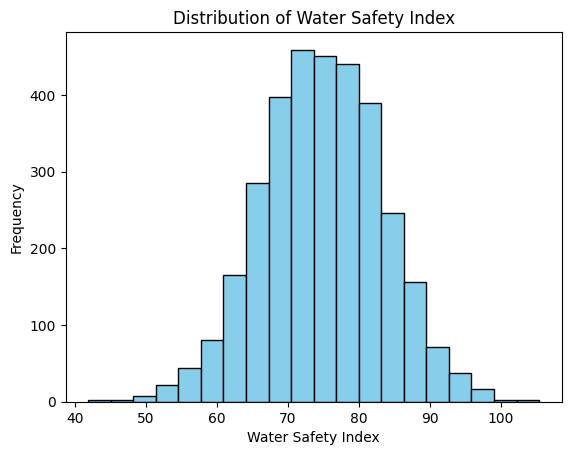

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['Water_Safety_Index'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Water Safety Index')
plt.ylabel('Frequency')
plt.title('Distribution of Water Safety Index')
plt.show()


In [9]:
print(df['Water_Safety_Level'].value_counts())


Water_Safety_Level
Safe        2339
Moderate     930
Unsafe         7
Name: count, dtype: int64


C:\Users\ADITYA\AppData\Local\Temp\ipykernel_18712\3529324397.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Water_Safety_Level'], palette='coolwarm')


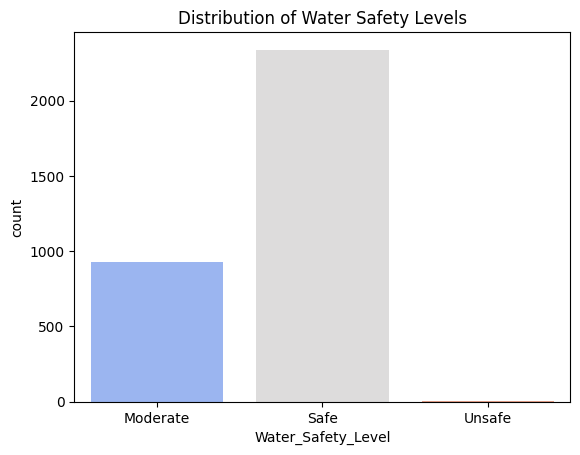

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Water_Safety_Level'], palette='coolwarm')
plt.title('Distribution of Water Safety Levels')
plt.show()


In [11]:
print(df[df['Water_Safety_Level'] == 'Unsafe'].describe())


             ph  Hardness        Solids  Chloramines   Sulfate  Conductivity  \
count  7.000000  7.000000      7.000000     7.000000  7.000000      7.000000   
mean   0.443079  0.506115  22838.769380     6.628855  0.523262      0.331667   
std    0.057047  0.100460   9199.079850     1.929328  0.086818      0.106721   
min    0.352365  0.365702  12149.696730     4.146601  0.360698      0.226646   
25%    0.408208  0.448103  16947.093239     4.921971  0.491661      0.270111   
50%    0.445144  0.501987  20922.154463     7.287310  0.579704      0.305065   
75%    0.490949  0.556790  26737.117667     8.158870  0.579704      0.352231   
max    0.505728  0.665329  39431.112653     8.806393  0.579704      0.545275   

       Organic_carbon  Trihalomethanes  Turbidity  Potability  \
count        7.000000         7.000000   7.000000    7.000000   
mean         0.409133         0.323728   1.722311    0.714286   
std          0.131964         0.163024   0.257758    0.487950   
min          0.2138

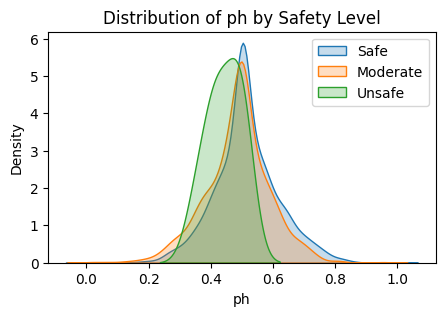

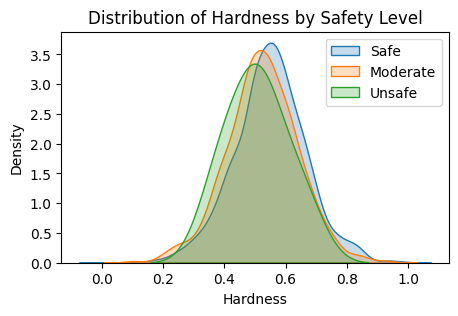

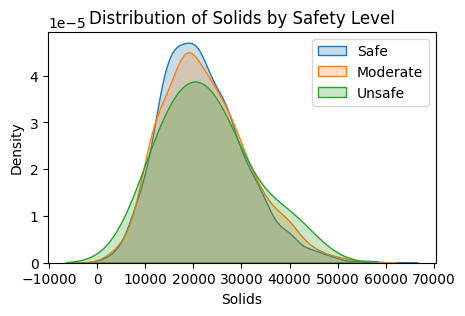

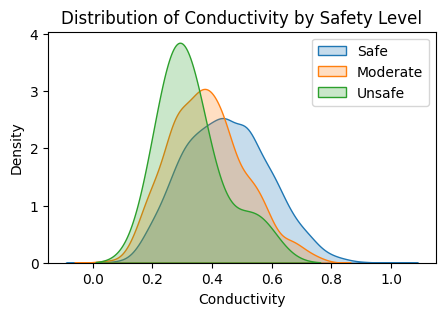

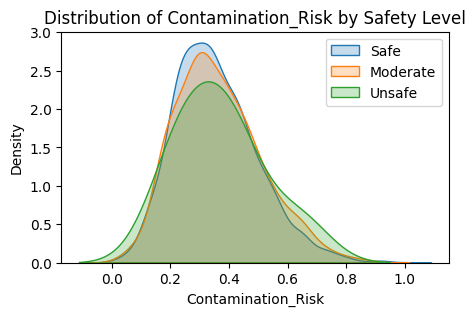

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['ph', 'Hardness', 'Solids', 'Conductivity', 'Contamination_Risk']
for feature in features:
    plt.figure(figsize=(5, 3))
    sns.kdeplot(df[df['Water_Safety_Level'] == 'Safe'][feature], label='Safe', fill=True)
    sns.kdeplot(df[df['Water_Safety_Level'] == 'Moderate'][feature], label='Moderate', fill=True)
    sns.kdeplot(df[df['Water_Safety_Level'] == 'Unsafe'][feature], label='Unsafe', fill=True)
    plt.title(f'Distribution of {feature} by Safety Level')
    plt.legend()
    plt.show()


In [13]:
print(df.dtypes)


ph                     float64
Hardness               float64
Solids                 float64
Chloramines            float64
Sulfate                float64
Conductivity           float64
Organic_carbon         float64
Trihalomethanes        float64
Turbidity              float64
Potability               int64
Hardness_Category       object
Contamination_Risk     float64
Water_Quality_Score    float64
Water_Safety_Index     float64
Water_Safety_Level      object
dtype: object


In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Water_Safety_Level'] = encoder.fit_transform(df['Water_Safety_Level'])


In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Convert categorical columns to numeric
df['Hardness_Category'] = encoder.fit_transform(df['Hardness_Category'])
df['Water_Safety_Level'] = encoder.fit_transform(df['Water_Safety_Level'])


In [16]:
df = pd.get_dummies(df, columns=['Hardness_Category', 'Water_Safety_Level'])


In [17]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Potability'])  # Features (Make sure target variable is not included)
y = df['Potability']  # Target variable

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


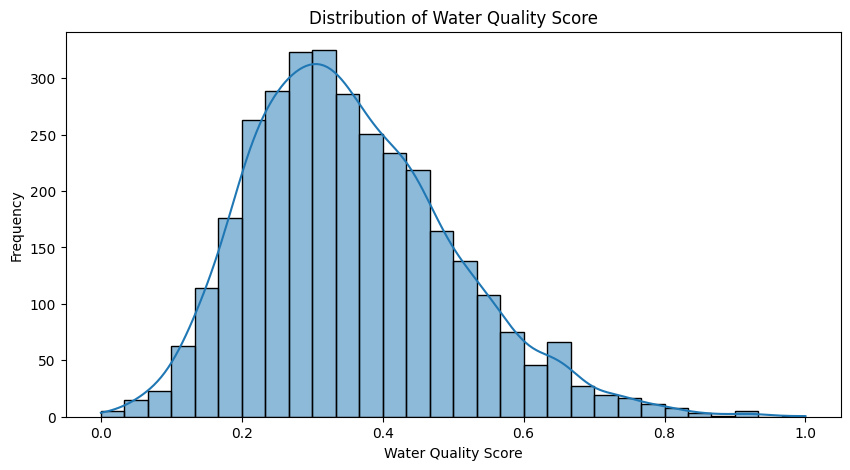

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df['Water_Quality_Score'], kde=True, bins=30)
plt.title("Distribution of Water Quality Score")
plt.xlabel("Water Quality Score")
plt.ylabel("Frequency")
plt.show()


In [19]:
print(df.columns)


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability',
       'Contamination_Risk', 'Water_Quality_Score', 'Water_Safety_Index',
       'Hardness_Category_0', 'Hardness_Category_1', 'Hardness_Category_2',
       'Hardness_Category_3', 'Water_Safety_Level_0', 'Water_Safety_Level_1',
       'Water_Safety_Level_2'],
      dtype='object')


In [20]:
# Select feature columns (excluding Potability)
X = df.drop(columns=['Potability'])

# Target variable
y = df['Potability']


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (use the same scaler)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on test data
y_pred = model.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.6326


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")


Random Forest Accuracy: 0.6905


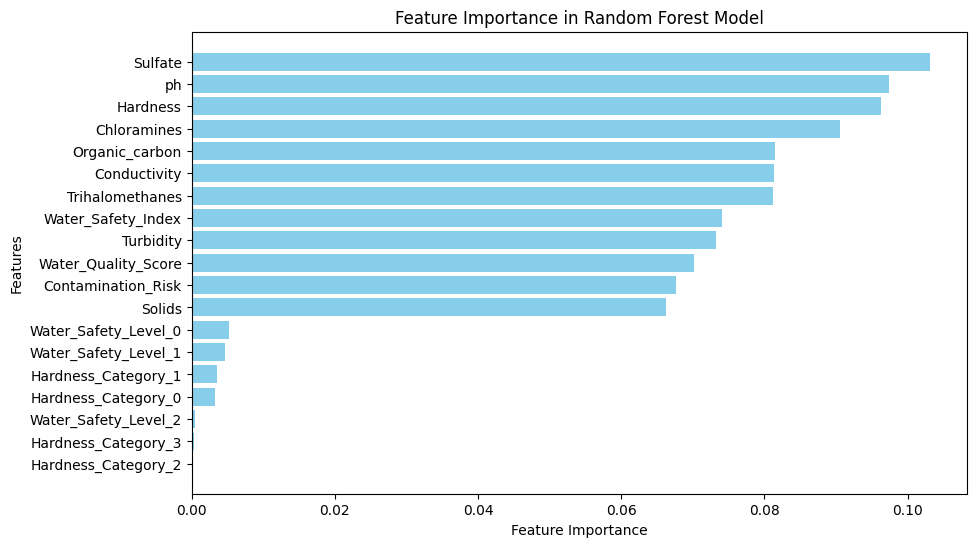

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X_train.columns[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, feature_importances[sorted_indices], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()


In [26]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluate
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Optimized Random Forest Accuracy:", accuracy)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Optimized Random Forest Accuracy: 0.6859756097560976


In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
svc = SVC()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier()

# Train and evaluate
models = {'SVM': svc, 'Gradient Boosting': gbc, 'KNN': knn, 'Random Forest (Optimized)': best_rf}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


SVM Accuracy: 0.6280
Gradient Boosting Accuracy: 0.6524
KNN Accuracy: 0.5168
Random Forest (Optimized) Accuracy: 0.6860


In [28]:
import joblib

# Save the best model
joblib.dump(best_rf, 'water_quality_model.pkl')
print("Model saved as 'water_quality_model.pkl'")


Model saved as 'water_quality_model.pkl'


In [29]:
import pickle
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Example dataset (Replace with actual dataset)
X = np.random.rand(100, 6)  # 100 samples, 6 features
y = np.random.randint(0, 2, 100)  # Binary classification (0 or 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Save model properly
with open("water_quality_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

print("✅ Model saved successfully as water_quality_model.pkl")


✅ Model saved successfully as water_quality_model.pkl


In [30]:
import pickle
import numpy as np

# Load the trained model
with open("water_quality_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

# Test input features (matching Flask request)
test_features = np.array([[7.2, 150, 15000, 3.0, 250, 500]])  # Example 1

# Check model prediction
prediction = model.predict(test_features)[0]
print(f"Predicted Water Quality: {'Safe' if prediction == 1 else 'Not Safe'}")


Predicted Water Quality: Safe


In [31]:
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train are your training data
y_train_pred = model.predict(X_train)

# Check training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")


Training Accuracy: 1.00


In [32]:
from sklearn.metrics import accuracy_score

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.45


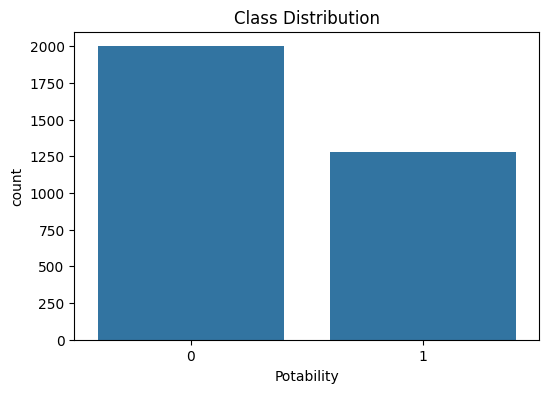

Potability
0    1998
1    1278
Name: count, dtype: int64


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Potability'])  # 'Potability' is the target column
plt.title("Class Distribution")
plt.show()

# Check value counts
print(df['Potability'].value_counts())


In [34]:
!pip install imbalanced-learn


In [35]:
from imblearn.over_sampling import SMOTE

# Define features and target variable
X = df.drop(columns=['Potability'])  # Features
y = df['Potability']  # Target variable

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
import numpy as np
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))  # Should now be balanced


{np.int64(0): np.int64(1998), np.int64(1): np.int64(1998)}


In [36]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X_resampled)

# Convert back to DataFrame for clarity
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples per split
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled_df, y_resampled)

# Get best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the best model
best_rf = grid_search.best_estimator_


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_resampled, test_size=0.2, random_state=42)

# Train the model with the best hyperparameters
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Show detailed performance metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.71

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72       394
           1       0.73      0.67      0.70       406

    accuracy                           0.71       800
   macro avg       0.71      0.71      0.71       800
weighted avg       0.71      0.71      0.71       800


Confusion Matrix:
 [[294 100]
 [134 272]]


In [39]:
importances = best_rf.feature_importances_
feature_names = X_scaled_df.columns

# Sort feature importance
sorted_indices = importances.argsort()[::-1]

# Print feature importance
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


ph: 0.0979
Sulfate: 0.0930
Chloramines: 0.0842
Hardness: 0.0821
Water_Safety_Index: 0.0800
Organic_carbon: 0.0767
Conductivity: 0.0749
Turbidity: 0.0748
Trihalomethanes: 0.0727
Water_Quality_Score: 0.0678
Contamination_Risk: 0.0669
Solids: 0.0647
Water_Safety_Level_0: 0.0274
Water_Safety_Level_1: 0.0228
Hardness_Category_1: 0.0076
Hardness_Category_0: 0.0056
Hardness_Category_3: 0.0006
Water_Safety_Level_2: 0.0004
Hardness_Category_2: 0.0000


In [40]:
# Drop least important features
drop_features = ["Hardness_Category_2", "Water_Safety_Level_2", "Hardness_Category_3"]
X_filtered = X_scaled_df.drop(columns=drop_features)

# Split again into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_resampled, test_size=0.2, random_state=42)

# Train the best model again
best_rf.fit(X_train, y_train)

# Predict on test data
y_pred = best_rf.predict(X_test)

# Evaluate again
accuracy = accuracy_score(y_test, y_pred)
print(f"Updated Test Accuracy: {accuracy:.2f}")
print("\nUpdated Classification Report:\n", classification_report(y_test, y_pred))
print("\nUpdated Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Updated Test Accuracy: 0.72

Updated Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73       394
           1       0.76      0.67      0.71       406

    accuracy                           0.72       800
   macro avg       0.73      0.72      0.72       800
weighted avg       0.73      0.72      0.72       800


Updated Confusion Matrix:
 [[307  87]
 [135 271]]


In [41]:
from xgboost import XGBClassifier

# Define the XGBoost model
xgb = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)

# Train on filtered dataset
xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Test Accuracy: {accuracy_xgb:.2f}")

print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Test Accuracy: 0.69

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.75      0.70       394
           1       0.72      0.64      0.68       406

    accuracy                           0.69       800
   macro avg       0.69      0.69      0.69       800
weighted avg       0.69      0.69      0.69       800


XGBoost Confusion Matrix:
 [[295  99]
 [148 258]]


In [42]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1]
}

# Create XGBoost model
xgb = XGBClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params_xgb = grid_search.best_params_
print(f"Best XGBoost Parameters: {best_params_xgb}")

# Train XGBoost with best parameters
best_xgb = XGBClassifier(**best_params_xgb, random_state=42)
best_xgb.fit(X_train, y_train)

# Evaluate model
y_pred_xgb = best_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"Optimized XGBoost Test Accuracy: {accuracy_xgb:.2f}")


Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Optimized XGBoost Test Accuracy: 0.68


In [43]:
# Drop low-importance features if they exist in the DataFrame
low_importance_features = ["Hardness_Category_2", "Water_Safety_Level_2", "Hardness_Category_3"]
existing_features = [feature for feature in low_importance_features if feature in X_train.columns]

X_train_filtered = X_train.drop(columns=existing_features)
X_test_filtered = X_test.drop(columns=existing_features)

# Train Random Forest again
best_rf.fit(X_train_filtered, y_train)
y_pred_rf = best_rf.predict(X_test_filtered)

# Evaluate again
accuracy_rf_filtered = accuracy_score(y_test, y_pred_rf)
print(f"Updated Random Forest Accuracy After Feature Selection: {accuracy_rf_filtered:.2f}")


Updated Random Forest Accuracy After Feature Selection: 0.72


In [44]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=300, max_depth=7, learning_rate=0.1, random_state=42))
]

# Define Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), n_jobs=-1)

# Train Stacking Model
stacking_clf.fit(X_train_filtered, y_train)

# Evaluate
y_pred_stacking = stacking_clf.predict(X_test_filtered)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

print(f"Stacking Classifier Accuracy: {accuracy_stacking:.2f}")


Stacking Classifier Accuracy: 0.72


In [45]:
import joblib

# Save the trained model with a new filename
new_model_filename = "water_quality_model_v2.pkl"
joblib.dump(stacking_clf, new_model_filename)

print(f"Model saved as {new_model_filename}")


Model saved as water_quality_model_v2.pkl


In [46]:
import joblib

model_path = "water_quality_model_v2.pkl"

try:
    model = joblib.load(model_path)
    print("Model loaded successfully!")
    print(type(model))  # Check the type of the loaded model
except Exception as e:
    print(f"Error loading model: {e}")


Model loaded successfully!
<class 'sklearn.ensemble._stacking.StackingClassifier'>


In [47]:
y_pred = model.predict(X_test_filtered)  # Assuming X_test_filtered is your test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.72


In [48]:
# Get the list of features (columns) used in training
trained_features = X_train.columns.tolist()
print("Features used for training:", trained_features)


Features used for training: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Contamination_Risk', 'Water_Quality_Score', 'Water_Safety_Index', 'Hardness_Category_0', 'Hardness_Category_1', 'Water_Safety_Level_0', 'Water_Safety_Level_1']


In [49]:
# Get feature importances from the trained model
importances = best_rf.feature_importances_

# Create a DataFrame to map features to their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 8 important features
print("Top 8 important features:")
print(feature_importance_df.head(8))


Top 8 important features:
               Feature  Importance
0                   ph    0.100888
4              Sulfate    0.093839
3          Chloramines    0.086189
1             Hardness    0.083907
11  Water_Safety_Index    0.080696
5         Conductivity    0.074999
6       Organic_carbon    0.074078
8            Turbidity    0.073584


In [51]:
# New list of important features excluding Water_Safety_Index
top_7_features = ['ph', 'Sulfate', 'Chloramines', 'Hardness', 'Conductivity', 'Organic_carbon', 'Turbidity']
# Filter the training and test data to include only these 7 features
X_train_filtered = X_train[top_7_features]
X_test_filtered = X_test[top_7_features]

# Retrain the model with the new features
best_rf.fit(X_train_filtered, y_train)

# Save the retrained model
joblib.dump(best_rf, "water_quality_model_v3.pkl")


['water_quality_model_v3.pkl']

In [52]:
import joblib

# Load the trained model
model_path = 'water_quality_model_v3.pkl'  # Use the correct path to your model file
model = joblib.load(model_path)

# Check if the model has feature_importances_ (e.g., for RandomForest or similar models)
if hasattr(model, 'feature_importances_'):
    feature_importances = model.feature_importances_

    # If you have the feature names, sort them based on importance
    feature_names = ['ph', 'sulfate', 'chloramines', 'hardness', 'conductivity', 'organic_carbon', 'turbidity']  # Match this with the features used during training
    feature_importance_dict = dict(zip(feature_names, feature_importances))
    
    # Sort the features based on importance
    sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

    print("Sorted features by importance:")
    for feature, importance in sorted_features:
        print(f"{feature}: {importance}")

else:
    print("This model does not have the feature_importances_ attribute.")


Sorted features by importance:
ph: 0.16658238381851787
sulfate: 0.14718177866192603
chloramines: 0.14423938113484733
hardness: 0.14269255425198768
organic_carbon: 0.13460911835667394
conductivity: 0.13241247999542974
turbidity: 0.1322823037806176


In [54]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=200, random_state=42)
xgb_model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [55]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Define and train XGBoost model
xgb_model = XGBClassifier(n_estimators=200, random_state=42)
xgb_model.fit(X_train, y_train)

# Define and train Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Create models dictionary
models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Logistic Regression": logreg_model
}

# Evaluate all models and print accuracy in percentage
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
    print(f"{name} Accuracy: {accuracy:.2f}%")



Random Forest Accuracy: 72.25%
XGBoost Accuracy: 69.12%
Logistic Regression Accuracy: 57.00%


In [61]:
# Ensure the features used in X_test match those in X_train
X_test = X_test[['ph', 'Sulfate', 'Chloramines', 'Hardness', 'Conductivity', 'Organic_carbon', 'Turbidity']]

# Now predict with the model
y_pred = model.predict(X_test)

# Accuracy in percentage
accuracy = accuracy_score(y_test, y_pred) * 100

# Print the model type and its accuracy
print(f"Final Algorithm: {type(model).__name__}")
print(f"Accuracy: {accuracy:.2f}%")


Final Algorithm: RandomForestClassifier
Accuracy: 66.25%
